# Modelling!

I will now dive into modelling the WNV cases using the datasets created in the previous Preprocessing notebook.  Hopefully I can improve upon the Logistic Regression model (especially the recall score) at the end of that notebook. 

Steps:
1.  Import data sets and modeling packages from sklearn. 
2. Try 3 different models, tune hyperparameters and evaluate each.  
    1. Random Forest
    2. XG Boost
    3. SVM
3. Select the best model and output the model. 

Import pandas numpy and all of the datasets.

In [20]:
random_seed = 27

In [16]:
import pandas as pd
import numpy as np

In [17]:
y_train = pd.read_csv('y_train.csv',index_col=0).to_numpy().reshape(-1,)
y_test = pd.read_csv('y_test.csv',index_col=0).to_numpy().reshape(-1,)

### Note these are already standard scaled
X_train = pd.read_csv('X_train.csv',index_col=0).to_numpy()
X_test = pd.read_csv('X_test.csv',index_col=0).to_numpy()

X_train_pca95 = pd.read_csv('X_train_pca95.csv',index_col=0).to_numpy()
X_test_pca95 = pd.read_csv('X_test_pca95.csv',index_col=0).to_numpy()

X_train_nmf = pd.read_csv('X_train_nmf.csv',index_col=0).to_numpy()
X_test_nmf = pd.read_csv('X_test_nmf.csv',index_col=0).to_numpy()

In [ ]:
print(X_train.shape

Ready for modelling! First I will try a RandomForest classifier

In [18]:
### import necessities from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_confusion_matrix,\
                plot_precision_recall_curve, plot_roc_curve, make_scorer

In [19]:
rf_clf = RandomForestClassifier?

In [23]:
### define grid parameters and fit model

params={'n_estimators':[50,80,100,120,150],\
       'criterion': ['gini','entropy'],\
       'max_depth':[3,5,7,9],
       'class_weight':[None,'balanced']}

rf_clf = RandomForestClassifier()

grid_rf_clf = GridSearchCV(rf_clf,param_grid=params,cv=5,n_jobs=-1,\
                           scoring=make_scorer(roc_auc_score))

grid_rf_clf.fit(X_train,y_train)

print('Best Params: ',grid_rf_clf.best_params_)
print('Best Score: ',grid_rf_clf.best_score_)

Best Params:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 150}
Best Score:  0.775081056487615


In [22]:
grid_rf_clf.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 9,
 'n_estimators': 120}

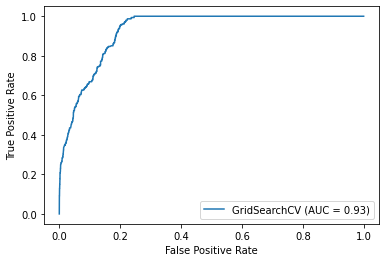

In [26]:
plot_roc_curve(grid_rf_clf,X_train,y_train);

In [27]:
plot_roc_curve(grid_rf_clf,X_test,y_test);

ValueError: Found input variables with inconsistent numbers of samples: [924, 3692]